# 1: Setup and Data Exploration

Author: Daniel Lusk

## Imports

In [4]:
import os

import matplotlib.pyplot as plt
import numpy as np
import rasterio as rio

## Visualize TRY/iNaturalist trait maps

First, let's look at the trait maps generated from TRY/iNaturalist observations by [Wolf, et al. (2022)](https://doi.org/10.1038/s41559-022-01904-x).

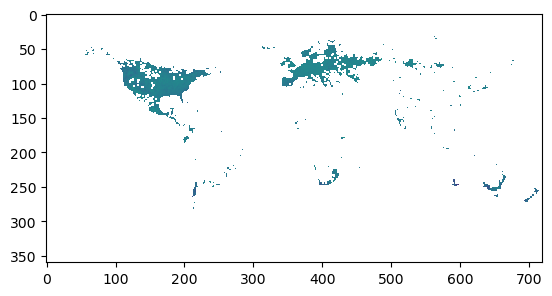

In [24]:
data_dir = "iNaturalist_traits/maps_iNaturalist/0.5_deg/ln"
raster = rio.open(os.path.join(data_dir, "iNat_Leaf.N.per.mass_05deg_ln.tif")).read()
raster = np.moveaxis(raster, 0, -1)
mask_val = raster[0, 0, 0]

plt.imshow(np.ma.masked_where(raster == mask_val, raster))